<a href="https://colab.research.google.com/github/babyraggge/ml-algorithms/blob/main/03_linear_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задача 1

Построить модель линейной регрессии.

-    линейная модель
-   полином второй степени
-    полином третьей степени
-   экспонента

Построить графики получившихся функций (линейная, квадратичная, кубическая, экспонента) и тренировочной выборки.

-    Посчитать MSE для каждого случая
-    Выбрать наилучший вариант (без тестовой выборки)

Для решения можете использовать np.linalg.lstsq, np.polyfit, np.poly1d, scipy.stats.linregress, scipy.optimize.curve_fit, sklearn.linear_model.LinearRegression, statsmodels, np.linalg.solve (аналитически) или с помощью стохастического градиентного спуска (написать самостоятельно).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.array([12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10])
x = np.linspace(0, 1, num = 24)

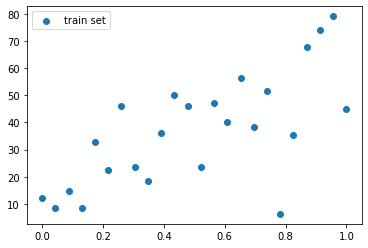

In [3]:
plt.scatter(x, y, label='train set')
plt.legend();

In [4]:
ones_vector = np.ones(len(x))
X = np.array(list(zip(ones_vector, x)))
W_linear = np.linalg.lstsq(X, y, rcond=None)[0]

In [5]:
X = np.array(list(zip(ones_vector, x, x*x)))
W_2 = np.linalg.lstsq(X, y, rcond=None)[0]

In [6]:
X = np.array(list(zip(ones_vector, x, x*x, x*x*x)))
W_3 = np.linalg.lstsq(X, y, rcond=None)[0]

In [7]:
W_exp = np.polyfit(x, np.log(y), 1)

In [8]:
def linear(x, w):
    return w[0] + w[1]*x

def poly2(x, w): 
    return w[0] + w[1]*x + w[2]*x*x

def poly3(x, w): 
    return w[0] + w[1]*x + w[2]*x*x + w[3]*x*x*x

def exp(x, w):
  # y = A * exp(B*x)
  # log(y) = log(A) + B*x
  return np.exp(w[0]) * np.exp(w[1]*x)

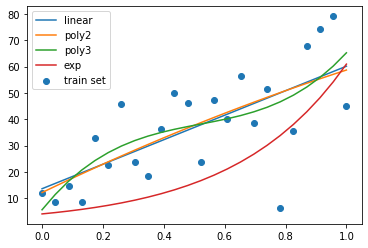

In [9]:
plt.scatter(x, y, label='train set')
plt.plot(x, linear(x, W_linear), label='linear')
plt.plot(x, poly2(x, W_2), label='poly2')
plt.plot(x, poly3(x, W_3), label='poly3')
plt.plot(x, exp(x, W_exp), label='exp')
plt.legend();

In [10]:
from sklearn.metrics import mean_squared_error

print("linear MSE: ", mean_squared_error(y, linear(x, W_linear)))
print("poly2 MSE: ", mean_squared_error(y, poly2(x, W_2)))
print("poly3 MSE: ", mean_squared_error(y, poly3(x, W_3)))
print("exp MSE: ", mean_squared_error(y, exp(x, W_exp)))

linear MSE:  213.13469863888886
poly2 MSE:  212.59353678557315
poly3 MSE:  202.513036590909
exp MSE:  482.01611836359854


Наилушее обобщение получилось для полинома третьей степени. Среднеквадартичная ошибка составляет 202.5

# Задача 2

Данные: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

1.    Разделите данные на train/test или используйте кросс-валидацию (можно grid search)

2.    Постройте несколько моделей линейной регрессии:

-    sklearn.linear_model.LinearRegression
-    sklearn.linear_model.Ridge
-    sklearn.linear_model.Lasso
-    sklearn.linear_model.ElasticNet

1.    Для последних трёх вариантов попробуйте разные значения коэффициента регуляризации.
2.    Сравните построенные модели по MSE на тестовой выборке (или через кросс-валидацию)
3.   Какая модель оказалась наилучшей? Почему?


In [11]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [12]:
diabetes_X.shape

(442, 10)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.3, random_state=0)

In [16]:
lr = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
elastic = linear_model.ElasticNet()

In [17]:
mse_lr_cv = cross_val_score(lr, diabetes_X, diabetes_y, cv=5, scoring="neg_mean_squared_error").mean()

In [26]:
models = [linear_model.Ridge(), linear_model.Lasso()]
param_grid = {'alpha': [.00001,.001, .01, .1, 1, 10, 100, 1000, 10000]}
for model in models:
  grid = GridSearchCV(model, 
                    param_grid=param_grid,
                    scoring="neg_mean_squared_error").fit(X_train, y_train)
  print(f"{type(model)} / {grid.best_params_} with best score: {grid.best_score_}")

mse_ridge_cv = cross_val_score(linear_model.Ridge(alpha=0.1), diabetes_X, diabetes_y, cv=5, scoring="neg_mean_squared_error").mean()
mse_lasso_cv = cross_val_score(linear_model.Lasso(alpha=0.1), diabetes_X, diabetes_y, cv=5, scoring="neg_mean_squared_error").mean()

<class 'sklearn.linear_model._ridge.Ridge'> / {'alpha': 0.1} with best score: -3005.420882796732
<class 'sklearn.linear_model._coordinate_descent.Lasso'> / {'alpha': 0.1} with best score: -3004.1987136257817


In [27]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def getElacsticResultsCV(param_grid={
    "alpha": [.00001,.001, .01, .1, 1, 10, 100, 1000, 10000],
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1]
    }):
  grid = GridSearchCV(linear_model.ElasticNet(), 
                      param_grid=param_grid,
                      scoring="neg_mean_squared_error").fit(X_train, y_train)
  print(f"{model} / {grid.best_params_} with best score: {grid.best_score_}")

In [28]:
getElacsticResultsCV()
mse_elastic_cv = cross_val_score(linear_model.ElasticNet(alpha=0.001, l1_ratio=0.75), diabetes_X, diabetes_y, cv=5, scoring="neg_mean_squared_error").mean()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) / {'alpha': 0.001, 'l1_ratio': 0.75} with best score: -2998.493848284963


In [29]:
print("")
print("Linear Regression mean CV MSE: ", mse_lr_cv)
print("Linear Regression with L2 regularization mean CV MSE: ", mse_ridge_cv)
print("Linear Regression with L1 regularization mean CV MSE: ", mse_lasso_cv)
print("ElasticNet mean CV MSE: ", mse_elastic_cv)


Linear Regression mean CV MSE:  -2993.0729432998864
Linear Regression with L2 regularization mean CV MSE:  -3006.6971771020735
Linear Regression with L1 regularization mean CV MSE:  -3008.8922219965725
ElasticNet mean CV MSE:  -3004.8521440830787
